# Linearization Methods

## John Wilson

July 22, 2017

In [21]:
# Import some necessary libraries

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import scipy.optimize as opt
from LinApp_FindSS import LinApp_FindSS
from LinApp_Deriv import LinApp_Deriv
from LinApp_Solve import LinApp_Solve
%matplotlib inline

### Problem 1

In [22]:
def Modeldyn1(theta0, params):
    '''
    This function takes vectors of endogenous and exogenous state variables
    along with a vector of 'jump' variables and returns values from the
    characterizing Euler equations.
    
    Inputs are:
        theta: a vector containng (Xpp, Xp, X, Yp, Y, Zp, Z) where:
            Xpp: value of capital in two periods
            Xp: value of capital in next period
            X: value of capital this period
            Yp: value of labor in next period
            Y: value of labor this period
            Zp: value of productivity in next period
            Z: value of productivity this period
        params: list of parameter values
    
    Output are:
        Euler: a vector of Euler equations written so that they are zero at the
            steady state values of X, Y & Z.  This is a 2x1 numpy array. 
    '''
    
    # unpack theta0
    (Xpp, Xp, X, Zp, Z) = theta0
    K = X
    Kp = Xp
    Kpp = Xpp
    Z = Z
    Zp = Zp
    
    alpha, beta = params
    
    """    numerator = alpha * beta * np.exp(zp) * kp ** (alpha - 1) * (np.exp(z) * k ** alpha - kp)
    denominator = np.exp(zp) * (kp ** alpha) - kpp
    
    # Evaluate Euler equations
    E1 = numerator / denominator - 1"""
    
    E = beta * ((alpha * np.exp(Zp) * Kp **(alpha - 1))/( np.exp(Zp) * Kp ** alpha - Kpp)) - \
        1 / (np.exp(Z) * K **alpha - Kp)
    
    return np.array([E])

In [23]:
nx = 1
ny = 0
nz = 1
logX = 0

alpha = 0.35
beta = 0.98
rho = 0.9
Sylv = 0
zbar = 0


params = (alpha, beta)

kinit = (alpha * beta) ** (1 / (1 - alpha))
theta0 = np.array([kinit, kinit, kinit, 0., 0.])

[AA, BB, CC, DD, FF, GG, HH, JJ, KK, LL, MM, WW, TT] = \
    LinApp_Deriv(Modeldyn1, params, theta0, nx, ny, nz, logX)

NN = rho
    
PP, QQ, UU, RR, SS, VV = LinApp_Solve(AA, BB, CC, DD, FF, GG, HH, JJ, KK, \
                                      LL, MM, WW, TT, NN, zbar, Sylv)


In [24]:
print("F = ", FF[0][0])
print("G = ", GG[0][0])
print("H = ", HH[0][0])
print("L = ", LL[0][0])
print("M = ", MM[0][0])
print("N = ", rho)
print("P = ", PP[0][0])
print("Q = ", QQ[0][0])

F =  7.33367647758
G =  -23.9477677954
H =  7.48334335527
L =  -1.41380536058
M =  4.12188151788
N =  0.9
P =  0.349999999755
Q =  0.192782618731


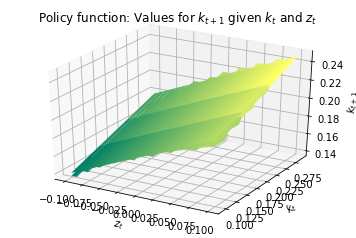

In [25]:
cmap1 = cm.get_cmap('summer')
kprime = np.genfromtxt("kprimevfi.txt")
z_grid = np.genfromtxt("zgridvfi.txt")
k_grid = np.genfromtxt("kgridvfi.txt")
z_mesh, k_mesh = np.meshgrid(z_grid, k_grid)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(z_mesh, k_mesh, kprime, rstride=8,
                cstride=1, cmap=cmap1)

kprime = np.zeros_like(kprime)
for i in range(len(z_grid)):
    for j in range(len(k_grid)):
        kprime[i][j] = kinit + PP[0][0] * (k_grid[j] - kinit) + QQ[0][0] * z_grid[i]
ax.plot_surface(z_mesh, k_mesh, kprime, rstride=8,
                cstride=1, cmap=cmap1)
        
kprime = np.zeros_like(kprime)
for i in range(len(z_grid)):
    for j in range(len(k_grid)):
        kprime[i][j] = alpha * beta * np.exp(z_grid[i]) * k_grid[j] ** alpha
ax.plot_surface(z_mesh, k_mesh, kprime, rstride=8,
                cstride=1, cmap=cmap1)
    
ax.set_title('Policy function: Values for $k_{t+1}$ given $k_t$ and $z_t$')
ax.set_xlabel(r'$z_t$')
ax.set_ylabel(r'$k_t$')
ax.set_zlabel(r'$k_{t+1}$')

You can see that all three solution methodologies lead to the same answer. However, note that the analytical solutions are more smoothe than the computational ones, which comes from discretization of the problem.

### Problem 2

In [26]:
nx = 1
ny = 0
nz = 1
logX = True
guessXY=0.1

alpha = 0.35
beta = 0.98
rho = 0.9
Sylv = 0
zbar = [0]


params = (alpha, beta)

XYbar = LinApp_FindSS(Modeldyn1, params, guessXY, zbar, nx, ny)
kbar = XYbar[0]
print("kbar=",kbar)

print((alpha * beta) ** (1 / (1 - alpha)))
theta0 = np.array([kbar, kbar, kbar, 0., 0.])

[AA, BB, CC, DD, FF, GG, HH, JJ, KK, LL, MM, WW, TT] = \
    LinApp_Deriv(Modeldyn1, params, theta0, nx, ny, nz, logX)

NN = rho
    
PP, QQ, UU, RR, SS, VV = LinApp_Solve(AA, BB, CC, DD, FF, GG, HH, JJ, KK, LL, MM, WW, TT, NN, zbar, Sylv)


kbar= 0.19278261945
0.1927826194504225


In [27]:
print("F = ", FF[0][0])
print("G = ", GG[0][0])
print("H = ", HH[0][0])
print("L = ", LL[0][0])
print("M = ", MM[0][0])
print("N = ", rho)
print("P = ", PP[0][0])
print("Q = ", QQ[0][0])

F =  1.41380536155
G =  -4.61671340559
H =  1.44265853428
L =  -1.41380536058
M =  4.12188151788
N =  0.9
P =  0.349999999755
Q =  0.999999996265


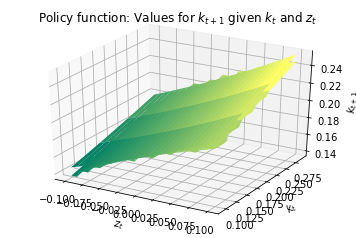

In [28]:
fig = plt.figure()
ax = fig.gca(projection='3d')

kprime = np.zeros_like(kprime)
for i in range(len(z_grid)):
    for j in range(len(k_grid)):
        kprime[i][j] = PP[0][0] * ((k_grid[j] - kbar) / kbar) + QQ[0][0] * z_grid[i]
kprime = kbar * np.exp(kprime)

ax.plot_surface(z_mesh, k_mesh, kprime, rstride=8,
                cstride=1, cmap=cmap1)

kprime = np.zeros_like(kprime)
for i in range(len(z_grid)):
    for j in range(len(k_grid)):
        kprime[i][j] = alpha * beta * np.exp(z_grid[i]) * k_grid[j] ** alpha
ax.plot_surface(z_mesh, k_mesh, kprime, rstride=8,
                cstride=1, cmap=cmap1)
ax.plot_surface(z_mesh, k_mesh, np.genfromtxt("kprimevfi.txt"), rstride=8,
                cstride=1, cmap=cmap1)

ax.set_title('Policy function: Values for $k_{t+1}$ given $k_t$ and $z_t$')
ax.set_xlabel(r'$z_t$')
ax.set_ylabel(r'$k_t$')
ax.set_zlabel(r'$k_{t+1}$')

Again the answers are almost identical, with differences due to computation.

### Problem 3

First, for ease of representation, let $Z = \tilde{Z}$ and $X = \tilde{X}$. Now suppose $ X_t = PX_{t-1} + QZ_t$ and $Z_t = NZ_{t-1} + \epsilon_t$. Then it follows that $ E_t\{FX_{t+1} + GX_t + HX_{t-1} + LZ_{t+1} + MZ_t\} = E_t\{FPX_t + FQZ_{t+1} + GPX_{t-1} + GQZ_t + HX_{t-1} + LNZ_t + L\epsilon_{t+1} + MZ_t\} = E\{FP^2X_{t-1} + FPQZ_t + FQNZ_t + FQ\epsilon_{t+1} + GPX_{t-1} + GQZ_t + HX_{t-1} + LNZ_t + L\epsilon_{t+1} + MZ_t\} =\ [(FP+G)P + H]X_{t-1} + [(FQ+L)N + (FP+G)Q+M]Z_t + E\{2L\epsilon_{t+1}\} = [(FP+G)P + H]X_{t-1} + [(FQ+L)N + (FP+G)Q+M]Z_t$

### Problem 4

In [29]:
def Modeldefs4(Xp, X, Y, Z, params):
    kp = Xp
    k = X
    ell = Y
    z = Z
    alpha, beta, tao, delta, a, gamma, xi = params
    
    r = alpha * (k ** (alpha - 1)) * (ell ** (1 - alpha))
    w = (k ** alpha) * (ell ** -alpha) * (1 - alpha)
    T = tao * ((w * ell + (r - delta) * k))
    y = k ** alpha * (np.exp(z) * ell) ** (1 - alpha)
    c = (1 - tao) * (w * ell + (r - delta) * k) + T + k - kp
    u = (c ** (1 - gamma) - 1) / (1 - gamma) + a * ((1 - ell) ** (1 - xi) - 1) / (1 - xi)
    
    return y, w, r, c, u, T

In [30]:
def Modeldyn4(theta0, params):
    '''
    This function takes vectors of endogenous and exogenous state variables
    along with a vector of 'jump' variables and returns values from the
    characterizing Euler equations.
    
    Inputs are:
        theta: a vector containng (Xpp, Xp, X, Yp, Y, Zp, Z) where:
            Xpp: value of capital in two periods
            Xp: value of capital in next period
            X: value of capital this period
            Yp: value of labor in next period
            Y: value of labor this period
            Zp: value of productivity in next period
            Z: value of productivity this period
        params: list of parameter values
    
    Output are:
        Euler: a vector of Euler equations written so that they are zero at the
            steady state values of X, Y & Z.  This is a 2x1 numpy array. 
    '''
    
    # unpack theat0
    (Xpp, Xp, X, Yp, Y, Zp, Z) = theta0
    alpha, beta, tao, delta, a, gamma, xi = params
    
    # find definitions for now and next period
    y, w, r, c, u, T = Modeldefs4(Xp, X, Y, Z, params)
    yp, wp, rp, cp, up, Tp = Modeldefs4(Xpp, Xp, Yp, Zp, params)
    
    # Evaluate Euler equations
    ell = Y
    E1 = (c ** (-gamma) * w * (1 - tao)) / (a * (1 - ell) ** (-xi)) - 1
    E2 = beta * (cp / c) ** (-gamma) * ((rp - delta) * (1 -tao) + 1) - 1
    
    
    return np.array([E1, E2])

In [31]:
gamma = 2.5
beta = 0.98
alpha = 0.4
delta = 0.1
z_bar = 0
tao = 0.05
xi = 1.5
a = 0.5

params = [alpha, beta, tao, delta, a, gamma, xi]

# Set LinApp parameters
Zbar = np.array([z_bar])
nx = 1
ny = 1
nz = 1
logX = 0
Sylv = 0

In [32]:
# take a guess for steady state values of k and ell
guessXY = np.array([.1, .25])

# find the steady state values using LinApp_FindSS
XYbar = LinApp_FindSS(Modeldyn4, params, guessXY, Zbar, nx, ny)
(kbar, ellbar) = XYbar
print ('XYbar: ', XYbar)

# set up steady state input vector
theta0 = np.array([kbar, kbar, kbar, ellbar, ellbar, z_bar, z_bar])

# check SS solution
check = Modeldyn4(theta0, params)
print ('check: ', check)
if np.max(np.abs(check)) > 1.E-6:
    print ('Have NOT found steady state')

XYbar:  [ 4.22522903  0.57979145]
check:  [ -9.43689571e-15   0.00000000e+00]


In [33]:
ybar, wbar, rbar, cbar, ubar, tbar = Modeldefs4(kbar,kbar,ellbar, 0.,params)
print("Kbar = ",kbar)
print("lbar = ",ellbar)
print("ybar = ",ybar)
print("wbar = ",wbar)
print("rbar = ",rbar)
print("cbar = ",cbar)
print("ubar = ",ubar)
print("Tbar = ",tbar)

Kbar =  4.22522902678
lbar =  0.579791453167
ybar =  1.28322610883
wbar =  1.32795276835
rbar =  0.121482277121
cbar =  0.860703206154
ubar =  -0.710872638118
Tbar =  0.0430351603077


### Problem 5

In [34]:
def calc_variables(extra_params):
    """
    Calculates all the state variables once in steady state. Used for 
    simplicity of calculating derivatives
    """
    zbar = np.array([extra_params[0]])
    params = extra_params[1:]
    guessXY = np.array([.1, .25])


    XYbar = LinApp_FindSS(Modeldyn4, params, guessXY, zbar, 1, 1)
    kbar, ellbar = XYbar
    ybar, wbar, rbar, cbar, ubar, tbar = Modeldefs4(kbar, kbar, ellbar, zbar, params)
    ibar = wbar * ellbar - cbar
    return np.array([kbar, cbar, rbar, wbar, ellbar, tbar, ybar, ibar])

In [35]:
derivs = np.zeros((8,8))
extra_params = [z_bar, alpha, beta, tao, delta, a, gamma, xi]
for i in range(8):
    temp_params = extra_params.copy()
    temp_params[i] = temp_params[i] + 1e-6
    values = (calc_variables(extra_params) - calc_variables(temp_params)) / (1e-6)
    derivs[i] = values
print(derivs)

[[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00  -7.69935896e-01   0.00000000e+00]
 [ -2.59849881e+01  -2.08521303e+00  -6.93889390e-11  -4.39589759e+00
    7.69382907e-01  -1.04260651e-01  -4.68371184e+00   5.58216716e-01]
 [ -6.54312504e+01  -1.75105826e+00   1.09603343e+00  -7.98740142e+00
   -2.60160475e-01  -8.75529129e-02  -8.29418329e+00  -3.22545172e+00]
 [  2.32322665e+00   2.34392425e-01  -2.26129471e-02   1.64791780e-01
    1.38923775e-01  -8.48983350e-01   4.66715091e-01   4.56366289e-02]
 [  4.83493862e+01   3.51127419e+00  -1.00000000e+00   7.28744796e+00
   -1.31976861e+00   1.75563710e-01   4.12103213e+00  -1.03865491e+00]
 [  1.84925289e+00   3.76703341e-01   0.00000000e+00   0.00000000e+00
    2.53756900e-01   1.88351671e-02   5.61628630e-01  -3.97261632e-02]
 [ -1.38699205e-01  -2.82538162e-02   1.38777878e-10  -1.11022302e-09
   -1.90324851e-02  -1.41269081e-03  -4.21237367e-02   2.97957414e-03]
 [  8.0165552

The above table can be interpreted. Across the top, output variables are, in this order, kbar, cbar, rbar, wbar, lbar, tbar, ybar, and ibar. The rows of each of these columns are the derivatives with respect to zbar, alpha, beta, tao, delta, a, gamma, and xi, in that order.

### Problem 6

In [36]:
def Modeldefs6(Xp, Lp, X, L, Z, params):
    kpp = Xp
    lp = Lp
    kp = X
    l = L
    z = Z
    alpha, beta, tao, delta, a, gamma, xi = params
    
    rp = alpha * (kp ** (alpha - 1)) * ((lp * np.exp(z)) ** (1 - alpha))
    wp = (kp ** alpha) * (lp ** -alpha) * (1 - alpha) * np.exp(z * (1 - alpha))
    Tp = tao * ((wp * lp + (rp - delta) * kp))
    yp = kp ** alpha * (np.exp(z) * lp) ** (1 - alpha)
    cp = (1 - tao) * (wp * lp + (rp - delta) * kp) + Tp + kp - kpp
    up = (cp ** (1 - gamma) - 1) / (1 - gamma) + a * ((1 - lp) ** (1 - xi) - 1) / (1 - xi)
    
    return yp, wp, rp, cp, up, Tp

In [37]:
def Modeldyn6(theta0, params):
    '''
    This function takes vectors of endogenous and exogenous state variables
    along with a vector of 'jump' variables and returns values from the
    characterizing Euler equations.
    
    Inputs are:

        params: list of parameter values
    
    Output are:
        Euler: a vector of Euler equations written so that they are zero at the
            steady state values of X, Y & Z.  This is a 2x1 numpy array. 
    '''
    
    # unpack theta0
    (Xpp, Lpp, Xp, Lp, X, L, Zp, Z) = theta0
    alpha, beta, tao, delta, a, gamma, xi = params
    
    # find definitions for now and next period
    yp, wp, rp, cp, up, Tp = Modeldefs6(Xp, Lp, X, L, Z, params)
    ypp, wpp, rpp, cpp, upp, Tpp = Modeldefs6(Xpp, Lpp, Xp, Lp, Zp, params)
    
    # Evaluate Euler equations
    l = Lp
    E1 = (cp ** (-gamma) * wp * (1 - tao)) / (a * (1 - l) ** (-xi)) - 1
    E2 = beta * (cpp / cp) ** (-gamma) * ((rpp - delta) * (1 -tao) + 1) - 1
    
    
    return np.array([E1, E2])

In [38]:
gamma = 2.5
beta = 0.98
alpha = 0.4
delta = 0.1
z_bar = 0
tao = 0.05
xi = 1.5
a = 0.5
rho = 0.9

params = [alpha, beta, tao, delta, a, gamma, xi]

# Set LinApp parameters
Zbar = np.array([z_bar])
nx = 2
ny = 0
nz = 1
logX = 0
Sylv = 0

In [39]:
# take a guess for steady state values of k and ell
guessXY = np.array([.1, .25])

# find the steady state values using LinApp_FindSS
XYbar = LinApp_FindSS(Modeldyn6, params, guessXY, Zbar, nx, ny)
(kbar, ellbar) = XYbar
print ('XYbar: ', XYbar)

# set up steady state input vector
theta0 = np.array([kbar, ellbar, kbar, ellbar, kbar, ellbar, z_bar, z_bar])

# check SS solution
check = Modeldyn6(theta0, params)
print ('check: ', check)
if np.max(np.abs(check)) > 1.E-6:
    print ('Have NOT found steady state')

XYbar:  [ 4.22522903  0.57979145]
check:  [ -9.43689571e-15   0.00000000e+00]


In [40]:
ybar, wbar, rbar, cbar, ubar, tbar = Modeldefs6(kbar,ellbar,kbar,ellbar, 0.,params)
print("Kbar = ",kbar)
print("lbar = ",ellbar)
print("ybar = ",ybar)
print("wbar = ",wbar)
print("rbar = ",rbar)
print("cbar = ",cbar)
print("ubar = ",ubar)
print("Tbar = ",tbar)

Kbar =  4.22522902678
lbar =  0.579791453167
ybar =  1.28322610883
wbar =  1.32795276835
rbar =  0.121482277121
cbar =  0.860703206154
ubar =  -0.710872638118
Tbar =  0.0430351603077


In [41]:
theta0 = np.array([kbar, ellbar, kbar, ellbar, kbar, ellbar, 0., 0.])
logX = True

[AA, BB, CC, DD, FF, GG, HH, JJ, KK, LL, MM, WW, TT] = \
    LinApp_Deriv(Modeldyn6, params, theta0, nx, ny, nz, logX)

NN = rho
    
PP, QQ, UU, RR, SS, VV = LinApp_Solve(AA, BB, CC, DD, FF, GG, HH, JJ, KK, \
                                      LL, MM, WW, TT, NN, z_bar, Sylv)

Sylvester equation solver condition is not satisfied; proceed with the original method...


In [42]:
print("F = ", FF)
print("G = ", GG)
print("H = ", HH)
print("L = ", LL)
print("M = ", MM)
print("N = ", rho)
print("P = ", PP)
print("Q = ", QQ)

F =  [[  0.           0.        ]
 [ 12.27260744  -2.16849645]]
G =  [[ 12.27260744  -4.70601255]
 [-24.87671844   2.23635645]]
H =  [[-12.13625099   0.        ]
 [ 12.53625099   0.        ]]
L =  [[ 0.        ]
 [-2.16849645]]
M =  [[-1.63635645]
 [ 2.23635645]]
N =  0.9
P =  [[ 0.91529369  0.        ]
 [-0.19192699  0.        ]]
Q =  [[ 0.12899709]
 [-0.01131016]]


### Problem 7

In [43]:
num_pers = 250
num_sims = 10000
Q = QQ.reshape((2,))

K = np.zeros((num_sims, num_pers))
L = np.zeros((num_sims, num_pers))
Y = np.zeros((num_sims, num_pers))
C = np.zeros((num_sims, num_pers))

for k in range(num_sims):
    et = np.random.normal(0, .02, num_pers)
    Zt = np.zeros(num_pers)
    for i in range(1, num_pers):
        Zt[i] = Zt[i-1]*rho + et[i]
    X = np.zeros((2,num_pers))
    for i in range(1,num_pers):
        X[:,i] = PP @ X[:,i-1] + Q * Zt[i]
    Kvec = kbar * np.exp(X[0])
    Lvec = ellbar * np.exp(X[1])
    Yvec = np.zeros(num_pers)
    Cvec = np.zeros(num_pers)
    Yvec[0] = ybar
    Cvec[0] = cbar
    for i in range(num_pers-1):
        y, w, r, c, u, t = Modeldefs6(Kvec[i+1], Lvec[i+1], Kvec[i], \
                                      Lvec[i], Zt[i-1], params)
        Yvec[i] = y
        Cvec[i] = c
    K[k] = Kvec
    L[k] = Lvec
    Y[k] = Yvec
    C[k] = Cvec
    
I = K[:,1:] - (1 + delta) * K[:,:-1]
C = C[:,1:-1]
Y = Y[:,1:-1]

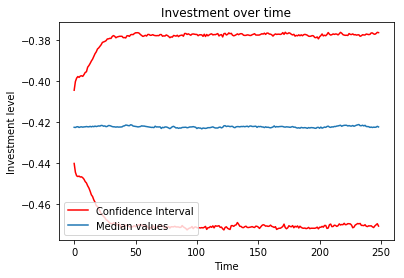

In [44]:
Imed = np.median(I, axis = 0)
Ihigh = np.percentile(I, 95, axis = 0)
Ilow = np.percentile(I, 5, axis = 0)
plt.plot(Ihigh, 'r', label = "Confidence Interval")
plt.plot(Imed, label = "Median values")
plt.plot(Ilow, 'r')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Investment level")
plt.title("Investment over time")

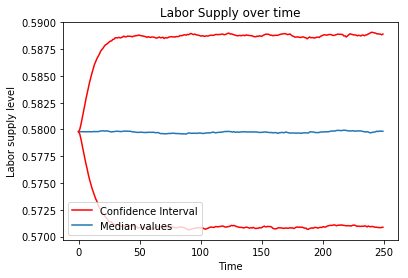

In [45]:
Lmed = np.median(L, axis = 0)
Lhigh = np.percentile(L, 95, axis = 0)
Llow = np.percentile(L, 5, axis = 0)
plt.plot(Lhigh, 'r', label = "Confidence Interval")
plt.plot(Lmed, label = "Median values")
plt.plot(Llow, 'r')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Labor supply level")
plt.title("Labor Supply over time")

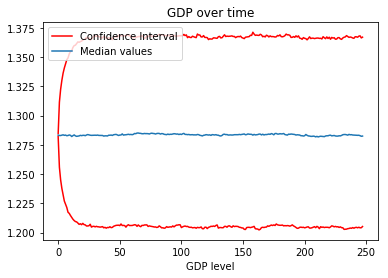

In [46]:
Ymed = np.median(Y, axis = 0)
Yhigh = np.percentile(Y, 95, axis = 0)
Ylow = np.percentile(Y, 5, axis = 0)
plt.plot(Yhigh, 'r', label = "Confidence Interval")
plt.plot(Ymed, label = "Median values")
plt.plot(Ylow, 'r')
plt.legend()
plt.xlabel("Time")
plt.xlabel("GDP level")
plt.title("GDP over time")

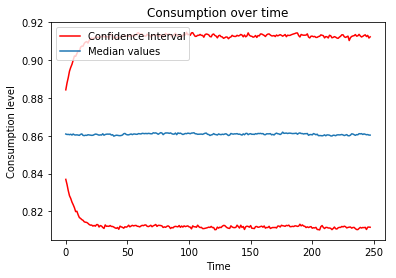

In [47]:
Cmed = np.median(C, axis = 0)
Chigh = np.percentile(C, 95, axis = 0)
Clow = np.percentile(C, 5, axis = 0)
plt.plot(Chigh, 'r', label = "Confidence Interval")
plt.plot(Cmed, label = "Median values")
plt.plot(Clow, 'r')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Consumption level")
plt.title("Consumption over time")

### Problem 8

In [48]:
# First row: GDP
# Second row: consumption
# Third row: investment
# Fourth row: labor

means = np.zeros((4,num_sims))
vols = np.zeros((4,num_sims))
coeffvars = np.zeros((4,num_sims))
rvols = np.zeros((4,num_sims))
pers = np.zeros((4,num_sims))
cycls = np.zeros((4,num_sims))

means[0] = np.mean(Y, axis = 1)
means[1] = np.mean(C, axis = 1)
means[2] = np.mean(I, axis = 1)
means[3] = np.mean(L, axis = 1)

vols[0] = np.std(Y, axis = 1)
vols[1] = np.std(C, axis = 1)
vols[2] = np.std(I, axis = 1)
vols[3] = np.std(L, axis = 1)

coeffvars = means / vols

rvols = np.divide(vols, vols[0])

for i in range(num_sims):
    pers[0,i] = np.correlate(Y[i,:-1],Y[i,1:])
    pers[1,i] = np.correlate(C[i,:-1],C[i,1:])
    pers[2,i] = np.correlate(I[i,:-1],I[i,1:])
    pers[3,i] = np.correlate(L[i,:-1],L[i,1:])
    
    cycls[0,i] = np.correlate(Y[i],Y[i])[0]
    cycls[1,i] = np.correlate(C[i],Y[i])[0]
    cycls[2,i] = np.correlate(I[i],Y[i])[0]
    cycls[3,i] = np.correlate(L[i],Y[i])[0]

In [49]:
avgmeans = np.mean(means, axis = 1)
avgvols = np.mean(vols, axis = 1)
avgcoeffvars = np.mean(coeffvars, axis = 1)
avgrvols = np.mean(rvols, axis = 1)
avgpers = np.mean(pers, axis = 1)
avgcycls = np.mean(cycls, axis = 1)

errmeans = np.std(means, axis = 1)
errvols = np.std(vols, axis = 1)
errcoeffvars = np.std(coeffvars, axis = 1)
errrvols = np.std(rvols, axis = 1)
errpers = np.std(pers, axis = 1)
errcycls = np.std(cycls, axis = 1)

In [50]:
variables = ["GDP", "Consumption", "Investment", "Labor"]
for i in range(4):
    print('\033[1m'+variables[i]+'\033[0m')
    print("Mean average: \t\t\t\t", avgmeans[i])
    print("Mean standard error: \t\t\t",errmeans[i])
    print("Volatility average: \t\t\t", avgvols[i])
    print("Volatility standard error: \t\t", errvols[i])
    print("Coefficient of Variation average: \t",avgcoeffvars[i])
    print("Coefficient of Variation standard error:",errcoeffvars[i])
    print("Relative volatility average: \t\t",avgrvols[i])
    print("Relative volatility standard error: \t", errrvols[i])
    print("Persistence average: \t\t\t",avgpers[i])
    print("Persistence standard error: \t\t",errpers[i])
    print("Cyclicity average: \t\t\t",avgcycls[i])
    print("Cyclicity standard error: \t\t",errcycls[i])
    print('\n')

GDP
Mean average: 				 1.28439431371
Mean standard error: 			 0.0159681180977
Volatility average: 			 0.0452863613982
Volatility standard error: 		 0.00769070807291
Coefficient of Variation average: 	 29.170342644
Coefficient of Variation standard error: 4.91000101731
Relative volatility average: 		 1.0
Relative volatility standard error: 	 0.0
Persistence average: 			 408.022113284
Persistence standard error: 		 10.1800865942
Cyclicity average: 			 409.704366378
Cyclicity standard error: 		 10.1918980662


Consumption
Mean average: 				 0.86129064156
Mean standard error: 			 0.00810025686089
Volatility average: 			 0.0290033118067
Volatility standard error: 		 0.00327824493336
Coefficient of Variation average: 	 30.0616760241
Coefficient of Variation standard error: 3.28505992503
Relative volatility average: 		 0.646902527656
Relative volatility standard error: 	 0.0423378599708
Persistence average: 			 183.405995272
Persistence standard error: 		 3.46203146306
Cyclicity average: 			 

### Problem 9

In [51]:
num_pers = 41
rho = 0.9
sigma = 0.02
Q = QQ.reshape((2,))

K = np.zeros(num_pers)
L = np.zeros(num_pers)
Y = np.zeros(num_pers)
C = np.zeros(num_pers)

Zt = np.zeros(num_pers)
Zt[0] = 0
for i in range(1,num_pers):
    Zt[i] = rho ** i * sigma
    
X = np.zeros((2,num_pers))
for i in range(1,num_pers):
    X[:,i] = PP @ X[:,i-1] + Q * Zt[i]
Kvec = kbar * np.exp(X[0])
Lvec = ellbar * np.exp(X[1])
Yvec = np.zeros(num_pers)
Cvec = np.zeros(num_pers)
Yvec[0] = ybar
Cvec[0] = cbar
for i in range(num_pers-1):
    y, w, r, c, u, t = Modeldefs6(Kvec[i+1], Lvec[i+1], Kvec[i], \
                                  Lvec[i], Zt[i-1], params)
    Yvec[i] = y
    Cvec[i] = c
    
Ivec = Kvec[1:] - (1 + delta) * Kvec[:-1]
Cvec = Cvec[:-1]
Yvec = Yvec[:-1]

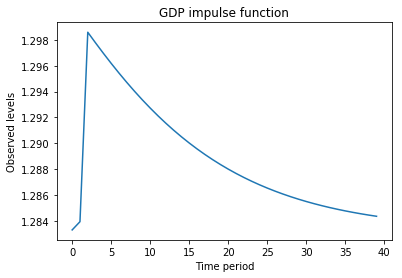

In [52]:
plt.plot(Yvec)
plt.title("GDP impulse function")
plt.xlabel("Time period")
plt.ylabel("Observed levels")

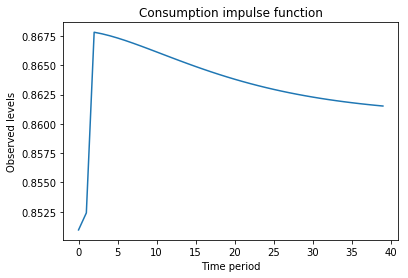

In [53]:
plt.plot(Cvec)
plt.title("Consumption impulse function")
plt.xlabel("Time period")
plt.ylabel("Observed levels")

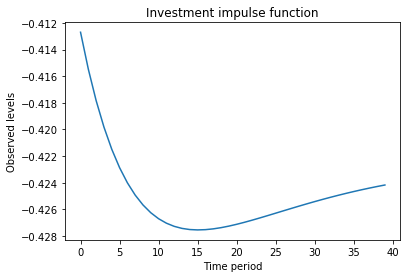

In [54]:
plt.plot(Ivec)
plt.title("Investment impulse function")
plt.xlabel("Time period")
plt.ylabel("Observed levels")

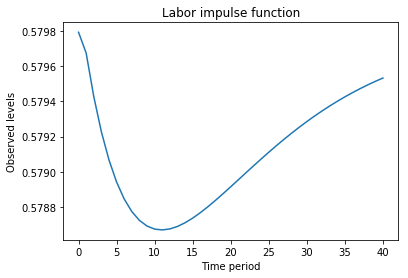

In [55]:
plt.plot(Lvec)
plt.title("Labor impulse function")
plt.xlabel("Time period")
plt.ylabel("Observed levels")

### Problem 10

In [56]:
#Household parameters
'''
Sigma is a scalar >= 1, represents coefficient of relative risk aversion 
'''
nvec = np.array([1.0, 1.0, 0.2])
yrs_lived = 60
S = 3
beta_annual = 0.96
beta = beta_annual ** (yrs_lived / S)
#beta = 0.55
sigma = 3 

#Firm parameters
alpha = 0.35 #how much is allocated to capital owners in economy
A = 1
delta_annual = 0.05
delta = 1 - (1 - delta_annual) ** (yrs_lived / S) 
params = (A, alpha, delta) 

#Market clearing conditions

L = np.sum(nvec)

#Firm's optimization problem

def getr(K, L, params):
    A, alpha, delta = params
    r = alpha * A * ((L / K) ** (1 - alpha)) - delta
    return r

def getw(K, L, params):
    A, alpha, delta = params
    w = (1 - alpha) * A * ((K / L) ** (alpha)) 
    return w

#Household's optimization problem

def getmuc1(b2b3vals, nvec, sigma, params, r, w):
    b2, b3 = b2b3vals
    K = sum(b2b3vals)
    ct1 = nvec[0] * w - b2 
    MUc1 = ct1 ** (-sigma)
    return MUc1

def getmuc2(b2b3vals, nvec, sigma, params, r, w):
    b2, b3 = b2b3vals
    K = np.sum(b2b3vals)
    ct2 = nvec[1] * w + (1 + r) * b2 - b3
    MUc2 = ct2 ** (-sigma)
    return MUc2

def getmuc3(b2b3vals, nvec, sigma, params, r, w):
    b2, b3 = b2b3vals
    K = np.sum(b2b3vals)
    ct3 = nvec[2] * w + (1 + r) * b3
    MUc3 = ct3 ** (-sigma)
    return MUc3

def errorcal(b2b3vals, args):
    beta, sigma, params, nvec = args
    b2, b3 = b2b3vals
    K = np.sum(b2b3vals)
    L = np.sum(nvec)
    r = getr(K, L, params)
    w = getw(K, L, params)
    MUc1 = getmuc1(b2b3vals, nvec, sigma, params, r, w)
    MUc2 = getmuc2(b2b3vals, nvec, sigma, params, r, w)
    MUc3 = getmuc3(b2b3vals, nvec, sigma, params, r, w)
    error1 = MUc1 - beta * (1 + r) * MUc2
    error2 = MUc2 - beta * (1 + r) * MUc3
    errors = np.array([error1, error2])
    return errors

b2_init = 0.02
b3_init = 0.02
b_init = np.array([b2_init, b3_init])
b_args = [beta, sigma, params, nvec]
b_result = opt.root(errorcal, b_init, args = b_args )

#Calculations
Kbar = sum(b_result.x)
rbar = getr(Kbar, L, params)
wbar = getw(Kbar, L, params)
b2bar = b_result.x[0]
b3bar = b_result.x[1]
ct1bar = nvec[0] * wbar - b2bar
ct2bar = nvec[1] * wbar + (1 + rbar) * b2bar - b3bar
ct3bar = nvec[2] * wbar + (1 + rbar) * b3bar

#TPI Paramters
T = 20
b_t1 = np.array([0.8 * b2bar, 1.1 * b3bar])
epsilon = 1e-9
K1_1 = np.sum(b_t1)
epscheck = False
xi = 0.5
counter = 1


def getline(T, K1_1, Kbar):
    points = [(1,K1_1),(T,Kbar)]
    T_coords, K_coords = zip(*points)
    A = np.vstack([T_coords,np.ones(len(T_coords))]).T
    m, c = np.linalg.lstsq(A, K_coords)[0]
    linevec = (m, c)
    return linevec

#Function that gives us the first Kvec_1 by a linear function

def getKvec_1(linevec, T):
    m, c = linevec
    Kvec_1 = np.zeros((T, 1))
    for i in range (0, T):
        Kvec_1[i] = (m * (i+1)) + c 
    return Kvec_1

def getrvec(Kvec, T, L, params):
    rvec = np.zeros((T, 1))
    for j in range (0, T):
        rvec[j] = getr(Kvec[j], L, params)
    return rvec

def getwvec(Kvec, T, L, params):
    wvec = np.zeros((T, 1))
    for k in range (0, T):
        wvec[k] = getw(Kvec[k], L, params)
    return wvec

def getmuc1_tpi(b2b3vals, nvec, sigma, params, w1):
    b2, b3 = b2b3vals
    ct1 = nvec[0] * w1 - b2 
    MUc1 = ct1 ** (-sigma)
    return MUc1

def getmuc2_tpi(b2b3vals, nvec, sigma, params, r2, w2):
    b2, b3 = b2b3vals
    ct2 = nvec[1] * w2 + (1 + r2) * b2 - b3
    MUc2 = ct2 ** (-sigma)
    return MUc2

def getmuc3_tpi(b2b3vals, nvec, sigma, params, r3, w3):
    b2, b3 = b2b3vals
    ct3 = nvec[2] * w3 + (1 + r3) * b3
    MUc3 = ct3 ** (-sigma)
    return MUc3

def tpi_uni_errorcal(b32, args):
    beta, sigma, params, nvec, b21, rvec, wvec = args
    r1 = rvec[0]
    r2 = rvec[1]
    w1 = wvec[0]
    w2 = wvec[1]
    b2b3vals = (b21, b32)
    MUc2 = getmuc2_tpi(b2b3vals, nvec, sigma, params, r1, w1)
    MUc3 = getmuc3_tpi(b2b3vals, nvec, sigma, params, r2, w2)
    error = MUc2 - beta * (1 + r2) * MUc3
    return error

def tpi_errorcal(b2b3vals, args):
    beta, sigma, params, nvec, rvec_trio, wvec_trio  = args
    b2, b3 = b2b3vals
    w1 = wvec_trio[0]
    w2 = wvec_trio[1]
    w3 = wvec_trio[2]
    r2 = rvec_trio[1]
    r3 = rvec_trio[2]
    MUc1 = getmuc1_tpi(b2b3vals, nvec, sigma, params, w1)
    MUc2 = getmuc2_tpi(b2b3vals, nvec, sigma, params, r2, w2)
    MUc3 = getmuc3_tpi(b2b3vals, nvec, sigma, params, r3, w3)
    error1 = MUc1 - beta * (1 + r2) * MUc2
    error2 = MUc2 - beta * (1 + r3) * MUc3
    errors = np.array([error1, error2])
    return errors

#Calculate linear function in between K1 and Kbar
linevec = getline(T, K1_1, Kbar)

#Get K_1 vector
Kvec = getKvec_1(linevec, T) 

while (epscheck == False):

    #Get r and w vectors given our assumed transition path
    rvec = getrvec(Kvec, T, L, params)
    wvec = getwvec(Kvec, T, L, params)

    #Solve for first period middle aged guy's old savings in 2nd period
    b32_init = 0.02
    b21 = b_t1[0]
    b_args_tpi_uni = [beta, sigma, params, nvec, b21, rvec, wvec]
    b_result_tpi_uni = opt.root(tpi_uni_errorcal, b32_init, args = b_args_tpi_uni )

    b32 = b_result_tpi_uni.x[0]

    #Iterate to solve for each individual's savings decisions

    rvec0 = np.append(rvec,np.array([rvec[T-1]]))
    rvec1 = np.append(rvec0,np.array([rvec[T-1]]))
    wvec0 = np.append(wvec,np.array([wvec[T-1]]))
    wvec1 = np.append(wvec0,np.array([wvec[T-1]]))
    
    K_prime = np.zeros((T, 1))
    b2t = np.zeros((T, 1))
    b3t = np.zeros((T, 1))

    b2t[0] = b21

    b3t[0] = b_t1[1]
    b3t[1] = b32
    
    for t in range(0, T): 
        rvec_trio = np.array([rvec1[t], rvec1[t+1],rvec1[t+2]])
        wvec_trio = np.array([wvec1[t], wvec1[t+1],wvec1[t+2]])
        b2init_tpi = 0.02
        b3init_tpi = 0.02
        b_init_tpi = np.array([b2init_tpi, b3init_tpi])
        b_args_tpi = [beta, sigma, params, nvec, rvec_trio, wvec_trio]
        b_result_tpi = opt.root(tpi_errorcal, b_init, args = b_args_tpi )
    
        #Create for our K_prime vector given each savings vector
        if t < (T - 1):
            b2t[t+1] = b_result_tpi.x[0]

        if t < (T - 2):
            b3t[t+2] = b_result_tpi.x[1]

        K_prime = b2t + b3t

    #Calculate the norm of K_prime - Kvec 

    norm = np.linalg.norm(K_prime - Kvec)

    #print("Iteration No. " + str(counter) + ": "\
     #+ "Difference = " + str(norm))

    counter += 1

    #Check to see if the norm is less than the tolerance level
    #Return true if so 

    if norm < epsilon:
        print (b_result_tpi)
        epscheck = True 

    else:

        #Else, get a new K vector if necessary
        #Passing in xi, this gives a new K that is a convex combination K_prime and K_1 

        Kvec = xi * K_prime + (1 - xi) * Kvec

# 5.4 Plot K values 

time = np.arange(1, T+6).reshape(T+5,1)

Kvec_stable = np.zeros(((5, 1)))

for k in range(0, 5):
    Kvec_stable [k] = np.array([Kvec[T-1]])

ktpi = np.vstack((Kvec, Kvec_stable))

def rfunc(K, L, params):
    A, alpha, delta = params
    r = alpha * A * ((L / K) ** (1-alpha)) - delta
    return r

def wfunc(K, L, params):
    A, alpha = params
    w = (1 - alpha) * A * ((K / L) ** alpha)
    return w

def muc1(n, w, r, b2, sigma):
    c1 = n * w - b2
    return c1 ** (-1. * sigma)

def muc2(n, w, r, b2, b3, sigma):
    c2 = n * w + (1. + r) * b2 - b3
    return c2 ** (-1. * sigma)
    
def muc3(n, w, r, b2, b3, sigma):
    c3 = n * w + (1. + r) * b3
    return c3 ** (-1. * sigma)

    fjac: array([[-0.89516086,  0.44574324],
       [-0.44574324, -0.89516086]])
     fun: array([ -4.54747351e-13,   3.69482223e-13])
 message: 'The solution converged.'
    nfev: 16
     qtf: array([ -3.29127994e-08,   4.82744477e-09])
       r: array([-12326.81535242,   4292.61819313,  -4410.65221336])
  status: 1
 success: True
       x: array([ 0.01931273,  0.05841156])


#### Code below uses the TPI methodology from OLG chapter

In [57]:
"""
Initialize parameters for the TPI method

"""
b2_bar, b3_bar = b2bar, b3bar
K = b2_bar + b3_bar
L = np.sum(nvec)
w_bar = (1 - alpha) * A * ((K / L) ** alpha)
r_bar = alpha * A * ((L / K) ** (1-alpha)) - delta
c1 = nvec[0] * w_bar - b2_bar
c2 = nvec[1] * w_bar + (1. + r_bar) * b2_bar - b3_bar
c3 = nvec[2] * w_bar + (1. + r_bar) * b3_bar
T = 20
tol = 1e-9
xi = 0.95
b2_initial = 0.8*b2_bar
b3_initial = 1.1*b3_bar
K1 = b2_initial + b3_initial
K_bar = b2_bar + b3_bar
K = np.append(np.linspace(K1,K_bar,T),[K_bar])
r = np.append(rfunc(K,L,(A,alpha,delta)),[r_bar]*4)
w = np.append(wfunc(K,L,(A,alpha)),[w_bar]*4)
params = [r, w, sigma, beta, nvec]

def euler_error(b2b3,params):
    b2, b3 = b2b3
    r1, r2, w, w1, w2, sigma, beta, nvec = params
    e1 = (nvec[0]*w-b2)**(-sigma) - beta * (1+r1)*\
                    ((1+r1)*b2+nvec[1]*w1-b3)**(-sigma)
    e2 = ((1+r1)*b2+nvec[1]*w1-b3)**(-sigma) - \
                    beta*(1+r2)*((1+r2)*b3+nvec[2]*w2)**(-sigma)
    return np.array([e1,e2])

def calcb3_init(b3,args):
    b2,r,w,beta,sigma,nvec = args
    return ((1+r[0])*b2[0]+w[0]-b3)**(-sigma) - beta*(1+r[1])*\
                                 ((1+r[1])*b3-nvec[2]*w[1])**(-sigma)

def calc_b(b2_initial, b3_initial, b_args):
    r, w, sigma, beta, nvec = b_args
    b2 = np.zeros_like(K)
    b3 = np.zeros_like(K)
    b2[0] = b2_initial
    b3[0] = b3_initial
    sol = opt.root(calcb3_init,0.1,[b2,r,w,beta,sigma,nvec])
    b3[1] = sol.x
    
    for i in range(1,T+1):
        sol = opt.root(euler_error,np.array([0.1,0.1]),\
                       args = [r[i], r[i+1], w[i-1], w[i], w[i+1], \
                               sigma, beta, nvec])
        if i != T:
            b2[i], b3[i+1] = sol['x']
        else:
            b2[i] = sol.x[0]
        if not sol.success:
            print( i)
            print( "FAIL")
    #print b2[-2]
    #print b3[-3]
    return (b2+b3)

In [58]:
K2 = calc_b(b2_initial, b3_initial, [r,w,sigma,beta,nvec])
iters=1
while np.linalg.norm(K2-K) > tol:
    iters+=1
    K=xi*np.copy(K2)+(1-xi)*K
    r = np.append(rfunc(K,L,(A,alpha,delta)),[r_bar]*4)
    w = np.append(wfunc(K,L,(A,alpha)),[w_bar]*4)
    b_args = [r, w, sigma, beta, nvec]
    K2 = calc_b(b2_initial, b3_initial, b_args)
    #print iters
K = np.copy(K2)

#### Now we use linearization

In [59]:
def Modeldefs(K33, K23, K32, K22, K31, K21, Zp, Z, params):
    '''
    This function takes vectors of endogenous and exogenous state variables
    along with a vector of 'jump' variables and returns explicitly defined
    values for consumption, gdp, etc.
    '''
    
    # unpack input vectors
    k33 = K33
    k32 = K32
    k31 = K31
    k23 = K23
    k22 = K22
    k21 = K21
    z = Z
    
    l1, l2, l3 = nvec
    
    # find definintion values
    K1 = k21 + k31
    K2 = k22 + k32
    K3 = k23 + k33
    L = l3 + l2 + l1
    r1 = alpha * (K1 ** (alpha-1)) * (L ** (1-alpha)) * np.exp(z)
    r2 = alpha * (K2 ** (alpha-1)) * (L ** (1-alpha)) * np.exp(z)
    w1 = (1-alpha) * K1 ** (alpha) * L ** (-alpha) * np.exp(z)
    w2 = (1-alpha) * K2 ** (alpha) * L ** (-alpha) * np.exp(z)
    c11 = w1 * l1 - k22
    c22 = w2 * l2 + (1 + r2 - delta) * k22 - k33
    c21 = w1 * l2 + (1 + r1 - delta) * k21 - k32
    c32 = w2 * l3 + (1 + r2 - delta) * k32
    c31 = w1 * l3 + (1 + r1 - delta) * k31
    y = K1**alpha*(L)**(1-alpha)*np.exp(z)
    inv = K2 - (1-delta) * K1
    
    return K1, K2, K3, L, r1, r2, w1, w2, c11, c22, c21, c32, y, inv, c31

In [60]:
def Modeldyn(theta0, params):
    '''
    This function takes vectors of endogenous and exogenous state variables
    along with a vector of 'jump' variables and returns values from the
    characterizing Euler equations.
    '''
    
    # unpack theta0
    (K33, K23, K32, K22, K31, K21, Zp, Z) = theta0
    
    # find definitions for now and next period
    K1, K2, K3, L, r1, r2, w1, w2, c11, c22, c21, c32, y, inv, c31 = \
                Modeldefs(K33, K23, K32, K22, K31, K21, Zp, Z, params)
    
    # Evaluate Euler equations
    E1 = c11 ** (-sigma) - (beta * c22 ** (-sigma) * (1 + r2 - delta))
    E2 = c21 ** (-sigma) - (beta * c32 ** (-sigma) * (1 + r2 - delta)) 
    
    return np.array([E1, E2])

In [61]:
# make parameter list to pass to functions
params = (alpha, beta, sigma, delta, nvec)

# set LinApp parameters
Zbar = np.array([0.])
nx = 2
ny = 0
nz = 1
logX = True
Sylv = 0

# take a guess for steady state values of k3 and k2
guessXY = np.array([0.5, 0.5 ])

# find the steady state values using LinApp_FindSS
XYbar = LinApp_FindSS(Modeldyn, params, guessXY, Zbar, nx, ny)
(k3bar, k2bar) = XYbar
print ('XYbar: ', XYbar)

# set up steady state input vector
theta0 = np.array([k3bar, k2bar, k3bar, k2bar, k3bar, k2bar, 0., 0.])

# check SS solution
check = Modeldyn(theta0, params)
print ('check: ', check)
if np.max(np.abs(check)) > 1.E-6:
    print ('Have NOT found steady state')

XYbar:  [ 0.05841159  0.01931274]
check:  [ -2.67164069e-11   7.07416348e-11]


C:\Users\John\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\John\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\John\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\John\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\John\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in double_scalars


In [62]:
[AA, BB, CC, DD, FF, GG, HH, JJ, KK, LL, MM, WW, TT] = \
    LinApp_Deriv(Modeldyn, params, theta0, nx, ny, nz, logX)
print('FF: ', FF)
print('GG: ', GG)
print('HH: ', HH)
print('LL: ', LL)
print('MM: ', MM)

# set value for NN 
rho = 0.9 ** 20
NN = rho
    
# find the policy and jump function coefficients
PP, QQ, UU, RR, SS, VV = \
    LinApp_Solve(AA,BB,CC,DD,FF,GG,HH,JJ,KK,LL,MM,WW,TT,NN,Zbar,Sylv)
print ('PP:',PP)
print ('QQ', QQ)

FF:  [[-137.73170528    0.        ]
 [   0.            0.        ]]
GG:  [[ 128.79694684  251.24888854]
 [ 305.15657878  -18.77371406]]
HH:  [[-143.77149724  -47.53544321]
 [ -37.37975929 -115.38666177]]
LL:  [[ 0.]
 [ 0.]]
MM:  [[ -78.47254921]
 [-205.56376776]]
Sylvester equation solver condition is not satisfied; proceed with the original method...
PP: [[ 0.16164297  0.38029487]
 [ 0.63635012  0.03530577]]
QQ [[ 0.67904801]
 [ 0.08800594]]


In [63]:
X = np.zeros((2, T))
ZZ = np.zeros(T)

X[0,0] = np.log(b3_initial) - np.log(b3_bar)
X[1,0] = np.log(b2_initial) - np.log(b2_bar)

for i in range(1, T-1):
    X[:,i] = PP @ X[:,i-1] + (QQ * ZZ[i]).reshape(2,)
    
X[0] = b3_bar * np.exp(X[0])
X[1] = b2_bar * np.exp(X[1])

K1 = np.sum(X, axis = 0)

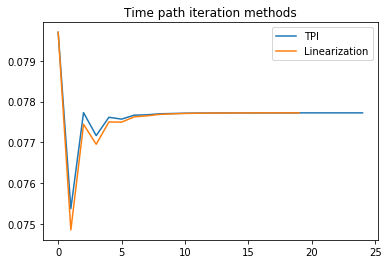

In [64]:
plt.plot(ktpi, label="TPI")
plt.plot(K1, label = "Linearization")
plt.title("Time path iteration methods")
plt.legend()
plt.show()

### Problem 11

In [65]:
K_bar, K_bar, K_bar, L_bar, r_bar, r_bar, w_bar, w_bar, c1_bar, c2_bar, \
        c2_bar, c3_bar, ys_bar, invs_bar, c3_bar = \
        Modeldefs(b3_bar, b2_bar, b3_bar, b2_bar, b3_bar, \
                  b2_bar, 0, 0, params)

num_pers = 250
num_sims = 10000
Q = QQ.reshape((2,))

K = np.zeros((num_sims, num_pers))
L = np.zeros((num_sims, num_pers))
Y = np.zeros((num_sims, num_pers))
C = np.zeros((num_sims, num_pers))

for k in range(num_sims):
    et = np.random.normal(0, .02, num_pers)
    Zt = np.zeros(num_pers)
    for i in range(1, num_pers):
        Zt[i] = Zt[i-1]*rho + et[i]
    X = np.zeros((2,num_pers))
    for i in range(1,num_pers):
        X[:,i] = PP @ X[:,i-1] + Q * Zt[i]
    b2vec = b2_bar * np.exp(X[0])
    b3vec = b3_bar * np.exp(X[1])
    Yvec = np.zeros(num_pers)
    Cvec = np.zeros(num_pers)
    Y[0] = ys_bar
    C[0] = c1_bar + c2_bar + c3_bar
    for i in range(num_pers-2):
        K1, K2, K3, L, r1, r2, w1, w2, c11, c22, c21, c32, ys, invs, c31 = \
        Modeldefs(b3vec[i+2], b2vec[i+2], b3vec[i+1], b2vec[i+1], b3vec[i], \
                  b2vec[i], Zt[i+1], Zt[i], params)
        Yvec[i] = ys
        Cvec[i] = c11+c21+c32
    Y[k] = Yvec
    C[k] = Cvec
    K[k] = b2vec + b3vec
    
I = K[:,1:] - (1 + delta) * K[:,:-1]
C = C[:,:-1]
Y = Y[:,:-1]

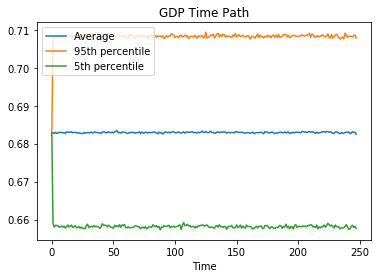

In [66]:
ymean = np.mean(Y, axis = 0)
y95 = np.percentile(Y, 95, axis = 0)
y5 = np.percentile(Y, 5, axis = 0)

cmean = np.mean(C, axis = 0)
c95 = np.percentile(C, 95, axis = 0)
c5 = np.percentile(C, 5, axis = 0)

imean = np.mean(I, axis = 0)
i95 = np.percentile(I, 95, axis = 0)
i5 = np.percentile(I, 5, axis = 0)

fig = plt.figure()
plt.plot(ymean[:-1], label = 'Average')
plt.plot(y95[:-1], label = '95th percentile')
plt.plot(y5[:-1], label = '5th percentile')
plt.title('GDP Time Path')
plt.xlabel('Time')
plt.legend()
plt.show()

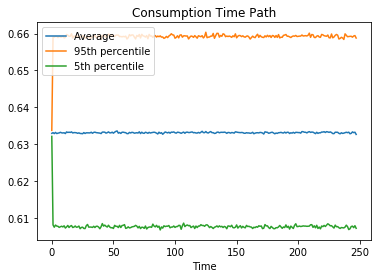

In [67]:
fig = plt.figure()
plt.plot(cmean[:-1], label = 'Average')
plt.plot(c95[:-1], label = '95th percentile')
plt.plot(c5[:-1], label = '5th percentile')
plt.title('Consumption Time Path')
plt.xlabel('Time')
plt.legend()
plt.show()

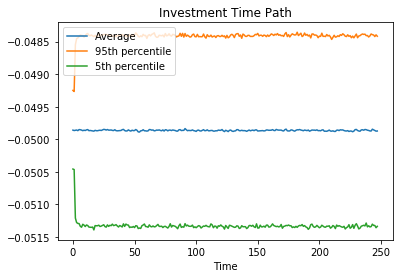

In [68]:
fig = plt.figure()
plt.plot(imean[:-1], label = 'Average')
plt.plot(i95[:-1], label = '95th percentile')
plt.plot(i5[:-1], label = '5th percentile')
plt.title('Investment Time Path')
plt.xlabel('Time')
plt.legend()
plt.show()